#**Overview**

Gustavo just started an e-commerce startup based in Portugal that recently opened an online website to sell their product. Fortunately, Gustavo is launching their website when the covid-19 hits and making them grow faster than ever. However, Gustavo is still not using targeted marketing which hurts their marketing budget as only a fraction of their user comes back to their website. Gustavo need our help as a data analyst to increase their marketing conversion rate by doing more targeted marketing using customer segmentation so that it will not hurt their budget.

##**Objectives**
1. Find the behavior of our customers.
2. Generate a group from our customers based on their loyalty.
3. Give insight(s) and recommendation(s)

##**To-Do**
1. Exploratory Data Analysis
2. Cluster Analysis
3. RFM Analysis

# **Dataset**

The list of dataset used in this project:
1. **orders_dataset**, the data have 8 columns which store informations about time and status.
  - **order_id** : 
Unique identifier of the order.
  - **customer_id** : Key to the orders dataset. Each order has a unique customer_id.
  - **order_status** : Reference to the order status (delivered, shipped, etc).
  - **order_purchase_timestamp** : Shows the purchase timestamp.
  - **order_approved_at** : Shows the payment approval timestamp.
  - **order_delivered_carrier_date** : Shows the order posting timestamp. When it was handled to the logistic partner.
  - **order_delivered_customer_date** : 
Shows the actual order delivery date to the customer.
  - **order_estimated_delivery_date** : Shows the estimated delivery date that was informed to customer at the purchase moment.

2. **customers_dataset**, the data have 5 columns which store informations about customer's details.
  - **customer_id** : 
Key to the orders dataset. Each order has a unique customer_id.
  - **customer_unique_id** : 
Unique identifier of the customer.
  - **customer_zip_code_prefix** : 
First five digits of customer zip code.
  - **customer_city** : Customer city name.
  - **customer_state** : Customer state.

3. **order_payment_dataset**, the data have 5 columns which store informations about customer's payment details.
  - **order_id** : Unique identifier of the order.
  - **payment_sequential** : A customer may pay an order with more than one payment method. If they does so, a sequence will be created to accommodate all payments.
  - **payment_type** : Method of payment chosen by the customer.
  - **payment_installments** : Number of installments chosen by the customer.
  - **payment_value** : Transaction value.

# **Data Preparation**

## **Importing Library**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn import cluster

## **Importing Dataset**

**Importing Order Dataset**

In [ ]:
su = 'https://docs.google.com/spreadsheets/d/1PK08ybe-ljyqxiF-Mx0o2f3pxP1IYk_6PPK7Qqo3koY/edit#gid=531407793'
sut = su.replace('/edit#gid=', '/export?format=csv&gid=')
df_order = pd.read_csv(sut)
df_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 0:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 3:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 0:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:38:49,2018-08-08 8:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 0:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 0:28:42,2017-12-15 0:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 0:00:00


**Importing Customers Dataset**

In [ ]:
su2 = 'https://docs.google.com/spreadsheets/d/1D0twymt-6nnK2azpC2cgAFsIJyD2daqkJ8zuqVtco_w/edit#gid=1931492204'
sut2 = su2.replace('/edit#gid=', '/export?format=csv&gid=')
df_customer = pd.read_csv(sut2)
df_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Importing Order Payment Dataset**

In [ ]:
su3 = 'https://docs.google.com/spreadsheets/d/1tcAkJK-Xo6QkneIs0ihOyEs08NKjsb33Q63fc_nu4fo/edit#gid=1265637324'
sut3 = su3.replace('/edit#gid=', '/export?format=csv&gid=')
df_order_payment = pd.read_csv(sut3)
df_order_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Make a Copy of the Dataset**

In [ ]:
df_oc = df_order.copy()
df_cc = df_customer.copy()
df_opc = df_order_payment.copy()

#**Data Cleaning**#

##**Handling Irrelevant Values**

Removing values that aren't going to be used in our analysis.
  - **Columns** that aren't going to be used.
  - **Rows** that have typos, outliers, Etc.

## **Handling Irrelevant Columns**

**Checking each dataset's columns**

In [ ]:
print(df_oc.info(), '\n')
print(df_cc.info(), '\n')
print(df_opc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 no

From the informations above, the irrelevant columns are:
  1. **order_dataset:** We only need time data where the customer order an item, so all time data will be removed except **order_purchase_timestamp**.
  2. **customer_dataset:** Remove **customer_zip_code_prefix** and **customer_state** because i want a detailed information about which city have the highest or the lowest sales.
  3. **order_payment_dataset:** Remove **payment_sequential**, the data only generate a sequence of paymet being used on each purchase and that's not needed for our analysis.

### **Order Dataset**

**1. Drop Irrelevant Columns in Order Dataset**

In [ ]:
df_oc.drop(df_oc.columns.tolist()[4:8],axis = 1, inplace = True)
df_oc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   order_id                  99441 non-null  object
 1   customer_id               99441 non-null  object
 2   order_status              99441 non-null  object
 3   order_purchase_timestamp  99441 non-null  object
dtypes: object(4)
memory usage: 3.0+ MB


Dropping other **timestamp** columns, because we only need to see the order made **timestamp**.

**2. Check Column's Values**

In [ ]:
df_oc['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

From the data there are multiple **order status**, but in this analysis what we going to use only the one with **delivered** status, because that's the only one we can categorized is as an **income** to the company and also because order status is around 90%+ of the full data, so we can drop the others.

**3. Dropping Irrelevant Values**

In [ ]:
df_oc = df_oc[df_oc['order_status'] == 'delivered']
df_oc['order_status'].value_counts()

delivered    96478
Name: order_status, dtype: int64

Because all **order status** is **delivered**, so we can **drop** the order status column.

In [ ]:
df_oc.drop(df_oc.columns[[2]], axis = 1, inplace = True)
df_oc.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,order_id,customer_id,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 8:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39


In [ ]:
print('Percentage of Data Dropped:',round((len(df_order) - len(df_oc))/len(df_order)*100,2), '%')

Percentage of Data Dropped: 2.98 %


### **Customer Dataset**

**1. Drop Irrelevant Columns in Customer Dataset**

In [ ]:
df_cc.drop(df_cc.columns[[2,4]], axis = 1, inplace = True)
df_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         99441 non-null  object
 1   customer_unique_id  99441 non-null  object
 2   customer_city       99441 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


**2. Check Column's Values**

In [ ]:
df_cc['customer_city'].value_counts()

sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: customer_city, Length: 4119, dtype: int64

There's nothing to remove in the **customer dataset**.

### **Order Payment Dataset**

**1. Drop Irrelevant Columns in Order Payment Dataset**

In [ ]:
df_opc.drop(df_opc.columns[[1]],axis = 1, inplace = True)
df_opc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_type          103886 non-null  object 
 2   payment_installments  103886 non-null  int64  
 3   payment_value         103886 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


**2. Check Column's Values**

In [ ]:
df_opc['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

There is payment type that is **not defined**, because the data is less than 1%, so it's fine to drop the values.

**3. Dropping Irrelevant Values**

In [ ]:
df_opc = df_opc[df_opc['payment_type'] != 'not_defined']
df_opc['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
Name: payment_type, dtype: int64

In [ ]:
print('Percentage of Data Dropped:',round((len(df_order_payment) - len(df_opc))/len(df_order_payment)*100,2), '%')

Percentage of Data Dropped: 0.0 %


## **Handling Missing Values**

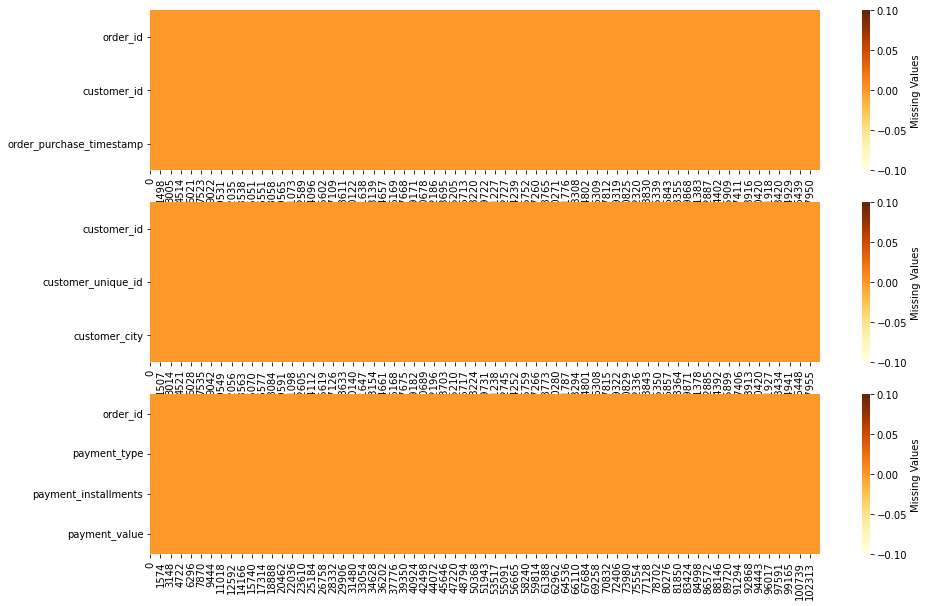

In [ ]:
plt.figure(figsize = (15, 10))
plt.subplot(3, 1, 1)
sns.heatmap(df_oc.isna().transpose(), cbar_kws = {'label':'Missing Values'}, cmap = 'YlOrBr')
plt.subplot(3, 1, 2)
sns.heatmap(df_cc.isna().transpose(), cbar_kws = {'label':'Missing Values'}, cmap = 'YlOrBr')
plt.subplot(3, 1, 3)
sns.heatmap(df_opc.isna().transpose(), cbar_kws = {'label':'Missing Values'}, cmap = 'YlOrBr')
plt.show()

In [ ]:
print(df_oc.isna().sum(), '\n')
print(df_cc.isna().sum(), '\n')
print(df_opc.isna().sum())

order_id                    0
customer_id                 0
order_purchase_timestamp    0
dtype: int64 

customer_id           0
customer_unique_id    0
customer_city         0
dtype: int64 

order_id                0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


From checking the dataset, there's no **null values** in all columns.

## **Handling Duplicates**

We have to check duplicate values and if it's affecting the quality of our data.

### **Order Dataset**

In [ ]:
df_oc.duplicated().sum()

0

There are no duplicated values in **order dataset**.

### **Customer Dataset**

In [ ]:
df_cc.duplicated().sum()

0

There are no duplicated values in **customer dataset**.

### **Order Payment Dataset**

In [ ]:
op_duplicate = df_opc[df_opc.duplicated()]
op_duplicate['payment_type'].value_counts()

voucher        602
credit_card     12
Name: payment_type, dtype: int64

We can see that in payment type there are **voucher** and **credit card** who have duplicated values, but in a purchase we can use multiple **payment type**, so we can assume that this is not something that have to be dropped.

## **Handling Outliers**

First off we have to check if there are any outliers in our data that can affect the quality of our analysis later on.

###**Outliers Boxplot**

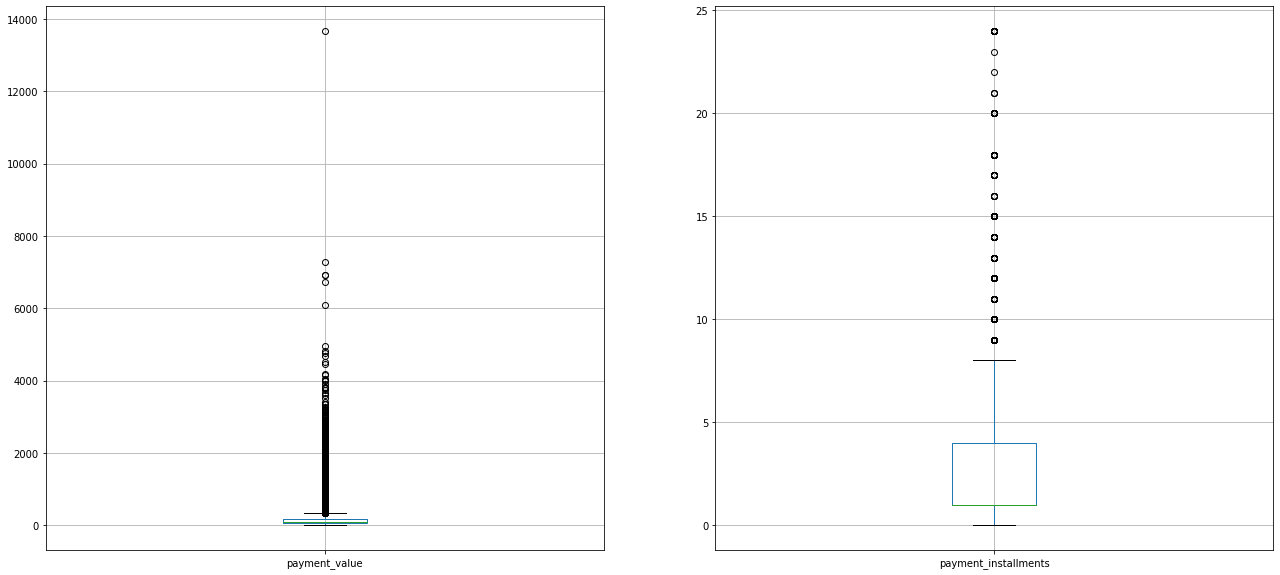

In [ ]:
plt.figure(figsize = (22, 10))
plt.subplot(1,2,1)
df_opc.boxplot(column = 'payment_value')
plt.subplot(1,2,2)
df_opc.boxplot(column = 'payment_installments')

it turns our that there are some outliers in **payment_value** and **payment_installments**

###**Remove Payment Value Outlier (a)**

In [ ]:
q1 = df_opc['payment_value'].quantile(0.25)
q3 = df_opc['payment_value'].quantile(0.75)
iqr = q3 - q1
ub = q3 + (1.5 * iqr)
lb = q1 - (1.5 * iqr)
print('Q1:', q1, '\n')
print('Q3:', q3, '\n')
print('IQR:', iqr, '\n')
print('Upperbound value:', ub, '\n')
print('Lowerbound value:', lb)

Q1: 56.8 

Q3: 171.84 

IQR: 115.04 

Upperbound value: 344.4 

Lowerbound value: -115.76


In [ ]:
filter_upper = df_opc['payment_value']>ub
filter_lower = df_opc['payment_value']<lb

df_opc = df_opc[~(filter_upper | filter_lower)]

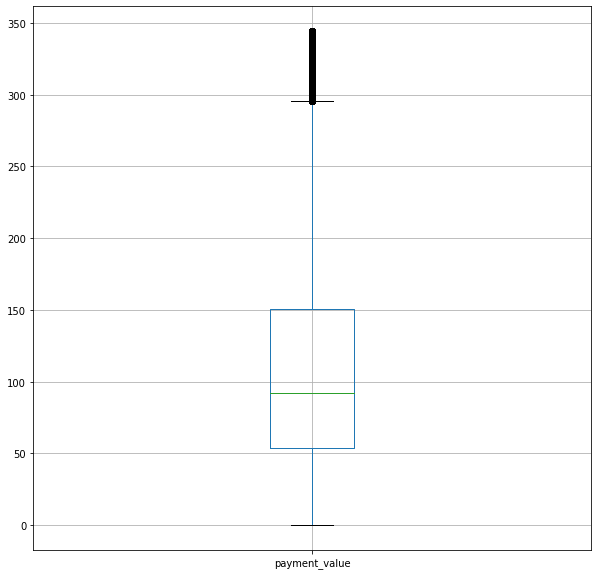

In [ ]:
plt.figure(figsize = (10, 10))

df_opc.boxplot(column = 'payment_value')

Now, the **payment value** only have a few outliers left.

###**Remove Payment Installment Outlier (b)**

In [ ]:
q1 = df_opc['payment_installments'].quantile(0.25)
q3 = df_opc['payment_installments'].quantile(0.75)
iqr = q3 - q1
ub = q3 + (1.5 * iqr)
lb = q1 - (1.5 * iqr)
print('Q1:', q1, '\n')
print('Q3:', q3, '\n')
print('IQR:', iqr, '\n')
print('Upperbound value:', ub, '\n')
print('Lowerbound value:', lb)

Q1: 1.0 

Q3: 3.0 

IQR: 2.0 

Upperbound value: 6.0 

Lowerbound value: -2.0


In [ ]:
filter_upper = df_opc['payment_installments']>ub
filter_lower = df_opc['payment_installments']<lb

df_opc = df_opc[~(filter_upper | filter_lower)]

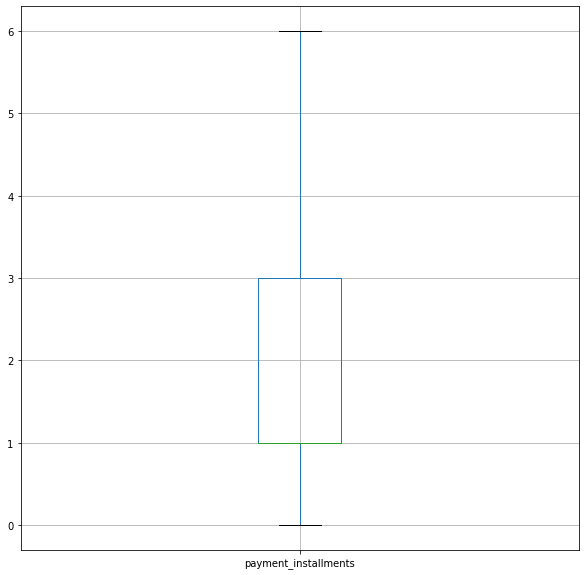

In [ ]:
plt.figure(figsize = (10, 10))

df_opc.boxplot(column = 'payment_installments')

Now, the **payment installments** doesn't have any outliers left.

## **Check Data type**

Checking the auto-assigned data type from python and making sure the data type is correct. If there's an incorrect data type, we have to convert it for the analysis.

In [ ]:
print(df_oc.info(), '\n')
print(df_cc.info(), '\n')
print(df_opc.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96478 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   order_id                  96478 non-null  object
 1   customer_id               96478 non-null  object
 2   order_purchase_timestamp  96478 non-null  object
dtypes: object(3)
memory usage: 5.0+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         99441 non-null  object
 1   customer_unique_id  99441 non-null  object
 2   customer_city       99441 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB
None 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87147 entries, 1 to 103885
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------         

After checking the data types, it shows that the type for **order_purchase_timestamp** is incorrect and we have to convert it to **datetime** format.

###**Converting to Datetime**

In [ ]:
df_oc['order_purchase_timestamp'] = df_oc['order_purchase_timestamp'].apply(pd.to_datetime)
df_oc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96478 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  96478 non-null  object        
 1   customer_id               96478 non-null  object        
 2   order_purchase_timestamp  96478 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 5.0+ MB


After doing the converting, now the column already converted to the right data type.

# **Combine Datasets**
After done **cleaning**, we can merge all the dataset into a **single dataset.**

###**Merging the Dataset**

In [ ]:
df = df_oc.merge(df_opc, how = 'left', left_on = 'order_id', right_on = 'order_id').merge(df_cc, how = 'left', left_on = 'customer_id', right_on = 'customer_id')
df.head()

,order_id,customer_id,order_purchase_timestamp,payment_type,payment_installments,payment_value,customer_unique_id,customer_city
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,sao paulo
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,voucher,1.0,2.00,7c396fd4830fd04220f754e42b4e5bff,sao paulo
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,voucher,1.0,18.59,7c396fd4830fd04220f754e42b4e5bff,sao paulo
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,barreiras
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis


before going further with the analysis, i decided to **make a copy** of the dataset, just for me to be sure that none of the main dataset getting changed on the process of **analysis**.

In [ ]:
dfc = df.copy()

In [ ]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100464 entries, 0 to 100463
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  100464 non-null  object        
 1   customer_id               100464 non-null  object        
 2   order_purchase_timestamp  100464 non-null  datetime64[ns]
 3   payment_type              84626 non-null   object        
 4   payment_installments      84626 non-null   float64       
 5   payment_value             84626 non-null   float64       
 6   customer_unique_id        100464 non-null  object        
 7   customer_city             100464 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 6.9+ MB


## **Handling Missing Values**

Checking missing values inside the combined data.

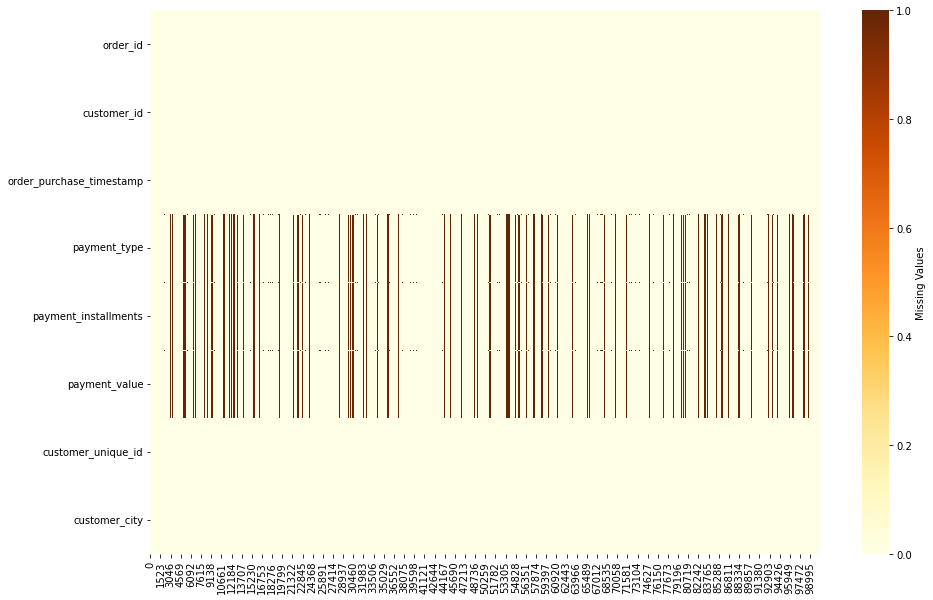

In [ ]:
plt.figure(figsize = (15, 10))
sns.heatmap(dfc.isna().transpose(), cbar_kws = {'label':'Missing Values'}, cmap = 'YlOrBr')

In [ ]:
dfc.isna().sum()

order_id                        0
customer_id                     0
order_purchase_timestamp        0
payment_type                15838
payment_installments        15838
payment_value               15838
customer_unique_id              0
customer_city                   0
dtype: int64

After checking the **missing values**, we can see that we have around **15.838** missing values.

In [ ]:
dfc.dropna(axis = 0, inplace = True)
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84626 entries, 0 to 100463
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  84626 non-null  object        
 1   customer_id               84626 non-null  object        
 2   order_purchase_timestamp  84626 non-null  datetime64[ns]
 3   payment_type              84626 non-null  object        
 4   payment_installments      84626 non-null  float64       
 5   payment_value             84626 non-null  float64       
 6   customer_unique_id        84626 non-null  object        
 7   customer_city             84626 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 5.8+ MB


Dropping **missing values** and the dataset is ready for **analysis**.

# **Exploratory Data Analysis**

Doing exploratory data analysis to find insights from the data, but first of all we should copy the data, so if anything happen during the EDA it wont change the main data.

In [ ]:
df_all = dfc.copy()
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84626 entries, 0 to 100463
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  84626 non-null  object        
 1   customer_id               84626 non-null  object        
 2   order_purchase_timestamp  84626 non-null  datetime64[ns]
 3   payment_type              84626 non-null  object        
 4   payment_installments      84626 non-null  float64       
 5   payment_value             84626 non-null  float64       
 6   customer_unique_id        84626 non-null  object        
 7   customer_city             84626 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 5.8+ MB


We **copy** the clean data so if something goes wrong, it wont change the main **merged data**.

## **Descriptive Statistic**

Checking descriptive statistic, there are 2 types of data:
1. Numerical
2. Non-numerical

###**Numerical Data**

In [ ]:
df_desc = df_all[['payment_value', 'payment_installments']].describe()
df_desc.loc['Skewness'] = df_all[['payment_value', 'payment_installments']].skew()
df_desc.loc['Kurtosis'] = df_all[['payment_value', 'payment_installments']].kurt()
df_desc.loc['Variance'] = df_all[['payment_value', 'payment_installments']].var()
df_desc.loc['Coefficient of Variance'] = np.std(df_all[['payment_value', 'payment_installments']])/np.mean(df_all[['payment_value', 'payment_installments']])*100
df_desc = round(df_desc, 2)
df_desc

,payment_value,payment_installments
count,84626.00,84626.00
mean,103.84,2.00
std,69.88,1.45
min,0.00,0.00
25%,50.69,1.00
50%,85.60,1.00
75%,141.09,3.00
max,344.34,6.00
Skewness,1.10,1.33
Kurtosis,0.83,0.65


####**Payment Value**
- The data is positively skewed and have a leptokurtic kurtosis, which means that the people with values lower than the means is higher.

####**Payment Installments**
- The data is positively skewed and have a leptokurtic kurtosis, which means that the people with values lower than the means is higher.

###**Datetime Data**

In [ ]:
df_all['date_day'] = df_all['order_purchase_timestamp'].dt.strftime('%d')
df_all['date_dayoweek'] = df_all['order_purchase_timestamp'].dt.strftime('%A')
df_all['date_month'] = df_all['order_purchase_timestamp'].dt.strftime('%B')
df_all['date_year'] = df_all['order_purchase_timestamp'].dt.strftime('%Y')
df_all['date_time'] = df_all['order_purchase_timestamp'].dt.strftime('%H')
df_all.drop('order_purchase_timestamp', axis = 1, inplace = True)
df_all

,order_id,customer_id,payment_type,payment_installments,payment_value,customer_unique_id,customer_city,date_day,date_dayoweek,date_month,date_year,date_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,sao paulo,02,Monday,October,2017,10
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,voucher,1.0,2.00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,02,Monday,October,2017,10
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,voucher,1.0,18.59,7c396fd4830fd04220f754e42b4e5bff,sao paulo,02,Monday,October,2017,10
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,barreiras,24,Tuesday,July,2018,20
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,08,Wednesday,August,2018,08
...,...,...,...,...,...,...,...,...,...,...,...,...
100458,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,credit_card,3.0,155.99,831ce3f1bacbd424fc4e38fbd4d66d29,sao paulo,23,Thursday,February,2017,09
100459,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,credit_card,3.0,85.08,6359f309b166b0196dbf7ad2ac62bb5a,sao jose dos campos,09,Thursday,March,2017,09
100460,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,credit_card,3.0,195.00,da62f9e57a76d978d02ab5362c509660,praia grande,06,Tuesday,February,2018,12
100461,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,credit_card,5.0,271.01,737520a9aad80b3fbbdad19b66b37b30,nova vicosa,27,Sunday,August,2017,14


In [ ]:
df_date = df_all.copy()
df_date.drop_duplicates('order_id', inplace = True)
df_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80640 entries, 0 to 100463
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              80640 non-null  object 
 1   customer_id           80640 non-null  object 
 2   payment_type          80640 non-null  object 
 3   payment_installments  80640 non-null  float64
 4   payment_value         80640 non-null  float64
 5   customer_unique_id    80640 non-null  object 
 6   customer_city         80640 non-null  object 
 7   date_day              80640 non-null  object 
 8   date_dayoweek         80640 non-null  object 
 9   date_month            80640 non-null  object 
 10  date_year             80640 non-null  object 
 11  date_time             80640 non-null  object 
dtypes: float64(2), object(10)
memory usage: 8.0+ MB


In [ ]:
df_date[df_date.columns.tolist()[7:12]].describe()

,date_day,date_dayoweek,date_month,date_year,date_time
count,80640,80640,80640,80640,80640
unique,31,7,12,3,24
top,24,Monday,August,2018,16
freq,3122,13193,8830,44648,5430


- the largest sales occurs at the date of **24th**.
- **Monday**is the busiest day on sales.
- The month with the highest sales is in **August**.
- The highest annuals sales is in **2018**.
- The busiest hour is aroung **4 P.M.**

###**Categorical Data**

In [ ]:
df_all[['payment_type']].describe()

,payment_type
count,84626
unique,4
top,credit_card
freq,59833


In [ ]:
df_all[['customer_city']].describe()

,customer_city
count,84626
unique,3823
top,sao paulo
freq,13736


####**Payment Type**
- The most used payment type is **credit card**.

####**Customer City**
- **Sao Paulo** is city with the highest order count.


## **Order Growth per Month**

Let's make a table see the growth of sales per month_year.

In [ ]:
order_growth_month = df_date.groupby(['date_month', 'date_year'])['order_id'].agg(['count'])
order_growth_month = pd.DataFrame(order_growth_month)
order_growth_month.reset_index(inplace = True)

month_n = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

order_growth_month['month_year'] = order_growth_month['date_month'].map(str) + ' ' + order_growth_month['date_year'].map(str)
order_growth_month['date_month'] = pd.Categorical(order_growth_month['date_month'], month_n)
order_growth_month.sort_values(['date_year', 'date_month'], inplace = True)
order_growth_month

,date_month,date_year,count,month_year
19,October,2016,201,October 2016
4,December,2016,1,December 2016
8,January,2017,599,January 2017
6,February,2017,1372,February 2017
14,March,2017,2113,March 2017
0,April,2017,1863,April 2017
16,May,2017,2851,May 2017
12,June,2017,2577,June 2017
10,July,2017,3168,July 2017
2,August,2017,3449,August 2017


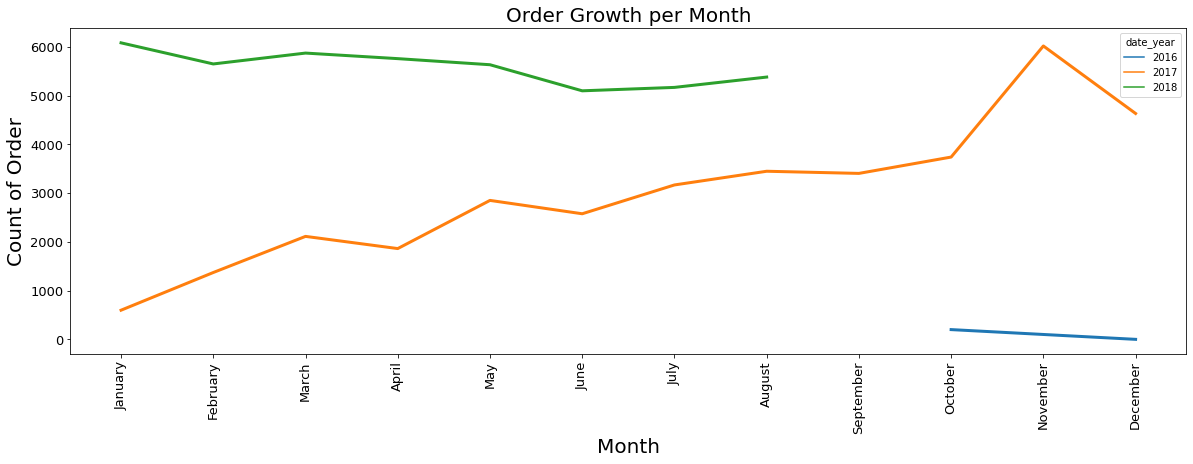

In [ ]:
plt.figure(figsize = (20, 6))
plt.xlabel('Month', fontsize = 20)
plt.ylabel('Count of Order', fontsize = 20)
plt.title('Order Growth per Month', fontsize = 20)
plt.xticks(fontsize=13, rotation=90)
plt.yticks(fontsize=13)

sns.lineplot(data = order_growth_month, x = 'date_month', y = 'count', hue = 'date_year', linewidth = 3)
plt.show()

If we divide it by years, we can see that the data in **2016** is **incomplete**, but the sales it keep **growing** and in 2018 its **higher** than the **past 2 years**.

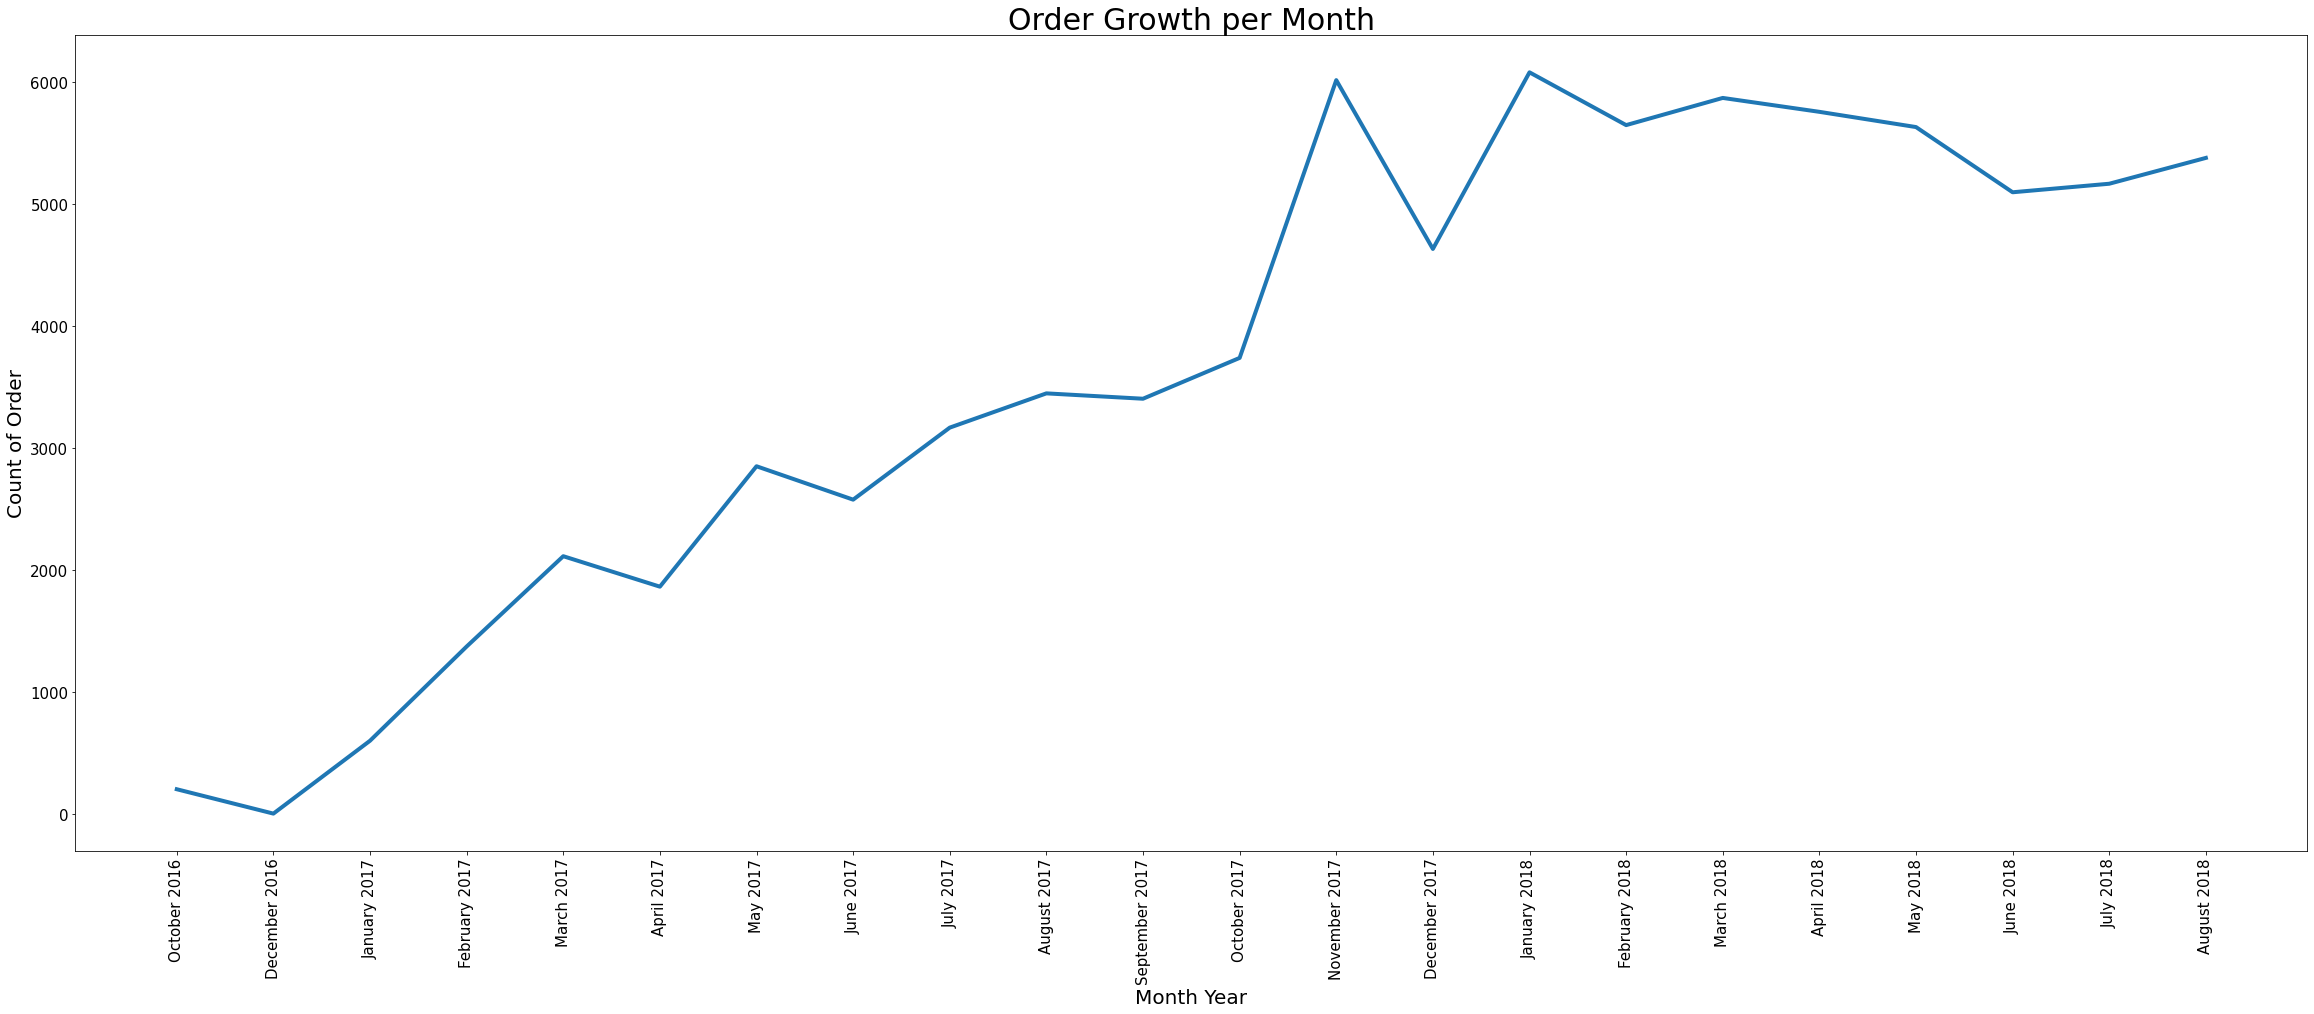

In [ ]:
x = order_growth_month['month_year']
y = order_growth_month['count']

plt.figure(figsize = (40, 15))
plt.xlabel('Month Year', fontsize = 20)
plt.ylabel('Count of Order', fontsize = 20)
plt.title('Order Growth per Month', fontsize = 30)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)

plt.plot(x, y, linewidth = 4)
plt.show()

From the chart we can see that the **highest peak** is around **November 2017** and **January 2018**, but there's is a sudden drop in **December 2017**, it needs a further analysis for the cause of the sudden drop.

## **Daily orders trend**

Now let's see what day have the highest sales.

In [ ]:
day_n = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

pivot_trend_daily = pd.pivot_table(df_date, values = 'order_id', index = ['date_dayoweek'], columns = ['date_year'], aggfunc = 'count')
pivot_trend_daily = pd.DataFrame(pivot_trend_daily)
pivot_trend_daily.reset_index(inplace = True)

pivot_trend_daily['date_dayoweek'] = pd.Categorical(pivot_trend_daily['date_dayoweek'], day_n)
pivot_trend_daily.sort_values(['date_dayoweek'], inplace = True)
pivot_trend_daily

date_year,date_dayoweek,2016,2017,2018
1,Monday,38,5716,7439
5,Tuesday,39,5741,7246
6,Wednesday,25,5387,7218
4,Thursday,32,5181,6749
0,Friday,28,5417,5940
2,Saturday,26,3947,4745
3,Sunday,14,4401,5311


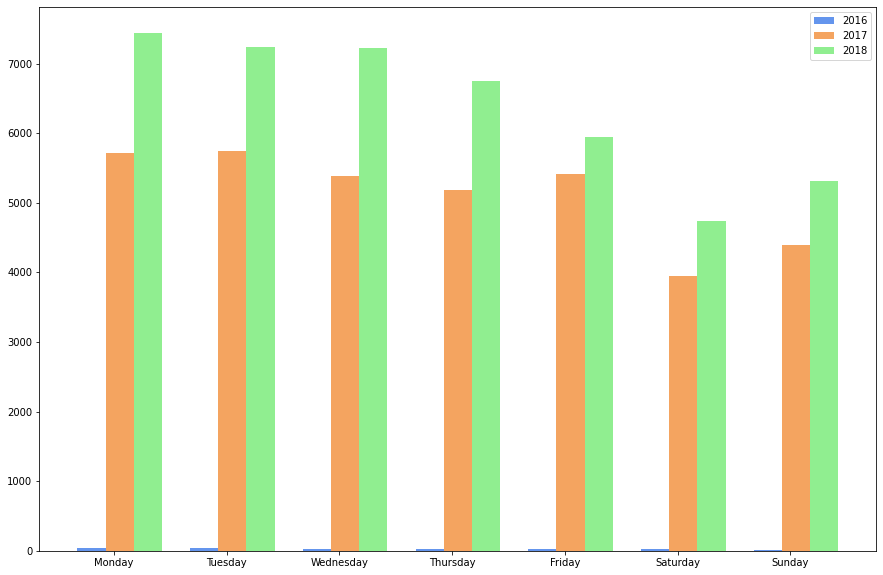

In [ ]:
x = pivot_trend_daily['date_dayoweek']
y = pivot_trend_daily['2016']
y2 = pivot_trend_daily['2017']
y3 = pivot_trend_daily['2018']
x_axis = np.arange(len(x))

fig = plt.figure(figsize = (15, 10))

plt.bar(x_axis - 0.2, y, 0.25, color = 'cornflowerblue', label = 2016)
plt.bar(x_axis + 0.05 , y2, 0.25, color = 'sandybrown', label = 2017)
plt.bar(x_axis + 0.3, y3, 0.25, color = 'lightgreen', label = 2018)
plt.xticks(x_axis, x)
plt.legend()
plt.show()

The daily order trend from the chart divided by year is:
- **Monday** and **Tuesday** are the two with the highest sales on **2017** and **2018**.

In [ ]:
order_trend_daily = df_date.groupby(['date_dayoweek'])['order_id'].agg(['count'])
order_trend_daily = pd.DataFrame(order_trend_daily)
order_trend_daily.reset_index(inplace = True)

order_trend_daily['date_dayoweek'] = pd.Categorical(order_trend_daily['date_dayoweek'], day_n)
order_trend_daily.sort_values(['date_dayoweek'], inplace = True)
order_trend_daily

,date_dayoweek,count
1,Monday,13193
5,Tuesday,13026
6,Wednesday,12630
4,Thursday,11962
0,Friday,11385
2,Saturday,8718
3,Sunday,9726


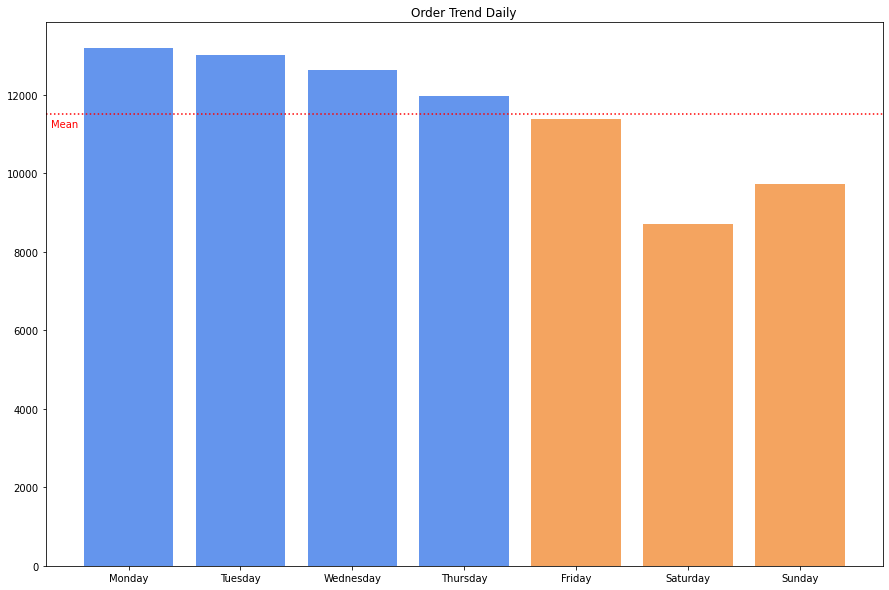

In [ ]:
x = order_trend_daily['date_dayoweek']
y = order_trend_daily['count']
mean = y.mean()

colors = []

for i in order_trend_daily['count']:
  if i < mean:
    colors.append('sandybrown')
  else:
    colors.append('cornflowerblue')

fig = plt.figure(figsize = (15, 10))
plt.title('Order Trend Daily')
plt.bar(x, y, color = colors)
plt.axhline(y = mean, color = 'red', linestyle = ':')
plt.text(0.13, 0.735, 'Mean', transform = fig.transFigure, color = 'red')
plt.show()

From the chart we can see that:
- **Monday - Thursday** sales are above the average.
- while in this chart we can see that the total highest order is in **Monday**.


## **Percantage of Payment Type**

Let's see which is the **most used** payment type.

In [ ]:
percentage_payment_type = df_date.groupby(['payment_type'])['payment_type'].agg(['count'])
percentage_payment_type = pd.DataFrame(percentage_payment_type)
percentage_payment_type.reset_index(inplace = True)
percentage_payment_type

,payment_type,count
0,boleto,17965
1,credit_card,58646
2,debit_card,1404
3,voucher,2625


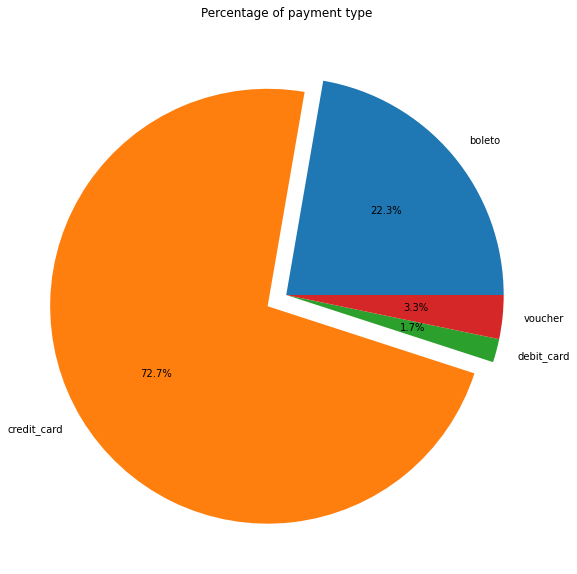

In [ ]:
xpl = (0, 0.1, 0, 0)

fig = plt.figure(figsize = (15,10))
plt.title('Percentage of payment type', fontsize = 12)
plt.pie(percentage_payment_type['count'], explode = xpl, labels = percentage_payment_type['payment_type'], autopct = '%0.1f%%')
plt.show()

We can see from the pie chart that **credit card** is the **majority** of used type for payment, with the percetage in **72,7%**.

## **Top 10 City by Number of Order**

Now, let's check which city have the highest number of order.

In [ ]:
top_order_city = df_date.groupby('customer_city')['order_id'].agg(['count'])
top_order_city = top_order_city.rename(columns = {'count' : 'total'})
top_order_city = top_order_city.reset_index()
top_order_city = top_order_city.sort_values('total', ascending = False)[1:11]
top_order_city

,customer_city,total
2910,rio de janeiro,5488
417,belo horizonte,2275
511,brasilia,1752
1059,curitiba,1231
652,campinas,1190
2725,porto alegre,1103
1410,guarulhos,1005
2997,salvador,973
3169,sao bernardo do campo,801
2268,niteroi,707


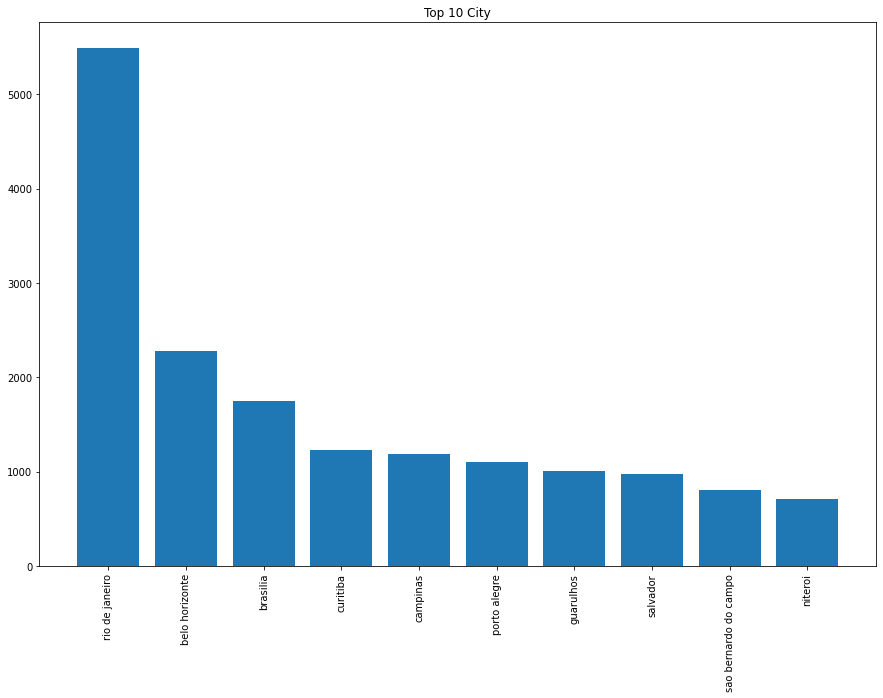

In [ ]:
x = top_order_city['customer_city']
y = top_order_city['total']

plt.figure(figsize = (15, 10))
plt.title('Top 10 City', fontsize = 12)
plt.xticks(rotation = 90)
plt.bar(x, y)
plt.show()

From the chart we can see that those are Top 10 city with the highest number of order.

# **Cluster Analysis**

Cluster based on customer city, so we can see the characteristic and behavior of the people in each city.

##**Data Preparation**

First, we need to **import the tools** needed for the analysis.

###**Import Sillhouette Tools**

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(20, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters)
        cluster_labels = clusterer.fit_predict(X)

        # print(pd.DataFrame(cluster_labels).value_counts())

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

##**Prepare Cluster**

###**Data Aggregation**

First, we need to **prepare the data** used for **clustering**. the data are:
- total_order
- total_user
- payment_value

each will values be used to determine the cluster number.

In [ ]:
dfc.head()

,order_id,customer_id,order_purchase_timestamp,payment_type,payment_installments,payment_value,customer_unique_id,customer_city
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,sao paulo
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,voucher,1.0,2.00,7c396fd4830fd04220f754e42b4e5bff,sao paulo
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,voucher,1.0,18.59,7c396fd4830fd04220f754e42b4e5bff,sao paulo
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,barreiras
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis


In [ ]:
df_cluster = dfc.groupby(['customer_city']).agg(total_order = pd.NamedAgg(column = 'order_id', aggfunc = 'nunique'), 
                                                total_user = pd.NamedAgg(column = 'customer_unique_id', aggfunc = 'nunique'),
                                                median_purchase_nominal = pd.NamedAgg(column = 'payment_value', aggfunc = 'median'))
df_cluster.reset_index(inplace = True)
df_cluster.set_index('customer_city', drop = True, inplace = True)
df_cluster

,total_order,total_user,median_purchase_nominal
customer_city,,,
abadia dos dourados,2,2,96.935
abaete,10,10,116.640
abaetetuba,5,5,70.495
abaiara,2,2,166.075
abaira,1,1,35.050
...,...,...,...
xinguara,6,6,93.980
xique-xique,3,3,57.780
zacarias,1,1,68.410


###**Scale**

After preparing the data, we have to **scale the data** first.

In [ ]:
scaler = MinMaxScaler()
df_scaled = df_cluster.copy()
df_scaled[:] = scaler.fit_transform(df_cluster[:])
df_scaled

,total_order,total_user,median_purchase_nominal
customer_city,,,
abadia dos dourados,0.000076,0.000079,0.272737
abaete,0.000686,0.000708,0.330809
abaetetuba,0.000305,0.000315,0.194816
abaiara,0.000076,0.000079,0.476497
abaira,0.000000,0.000000,0.090357
...,...,...,...
xinguara,0.000381,0.000393,0.264028
xique-xique,0.000153,0.000157,0.157344
zacarias,0.000000,0.000000,0.188671


###**Determine Cluster Number**

We are using 2 clustering method to determine the amount of clusters to be made. Those 2 methods are:
- Elbow
- Silhouette

####**Elbow Method**

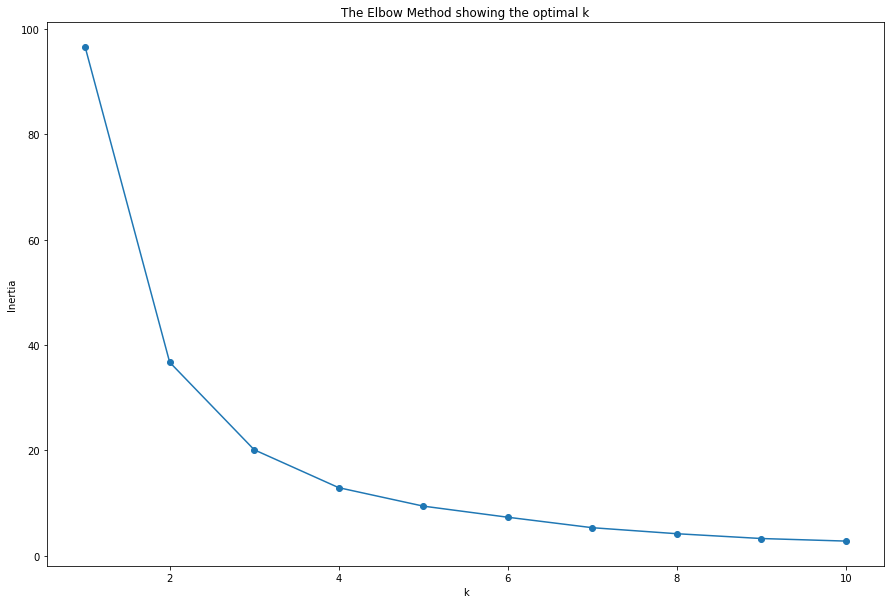

In [ ]:
dist = []
ran = range(1, 11)

for i in ran:
  kmean_model = cluster.KMeans(n_clusters = i)
  kmean_model.fit(df_scaled)
  dist.append(kmean_model.inertia_)
dist

plt.figure(figsize=(15,10))
plt.plot(ran, dist, 'o-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

####**Silhouette Method**

For n_clusters = 2 The average silhouette_score is : 0.6218097979206768
For n_clusters = 3 The average silhouette_score is : 0.5508703475034004
For n_clusters = 4 The average silhouette_score is : 0.5277357390001436
For n_clusters = 5 The average silhouette_score is : 0.516721458730998


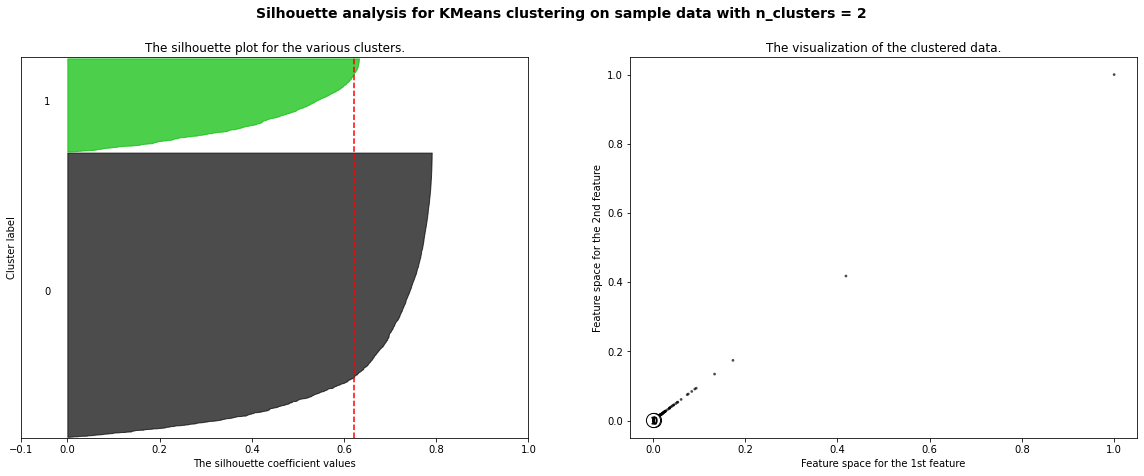

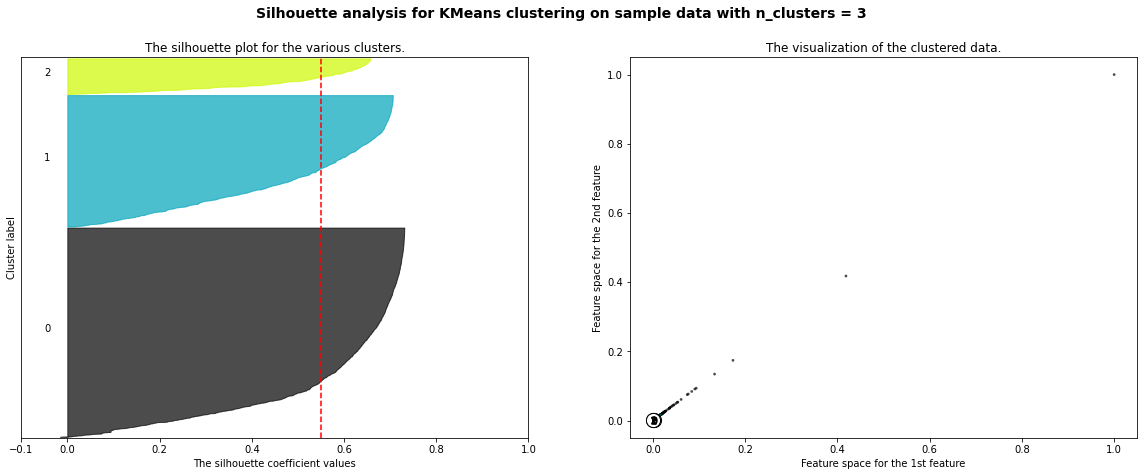

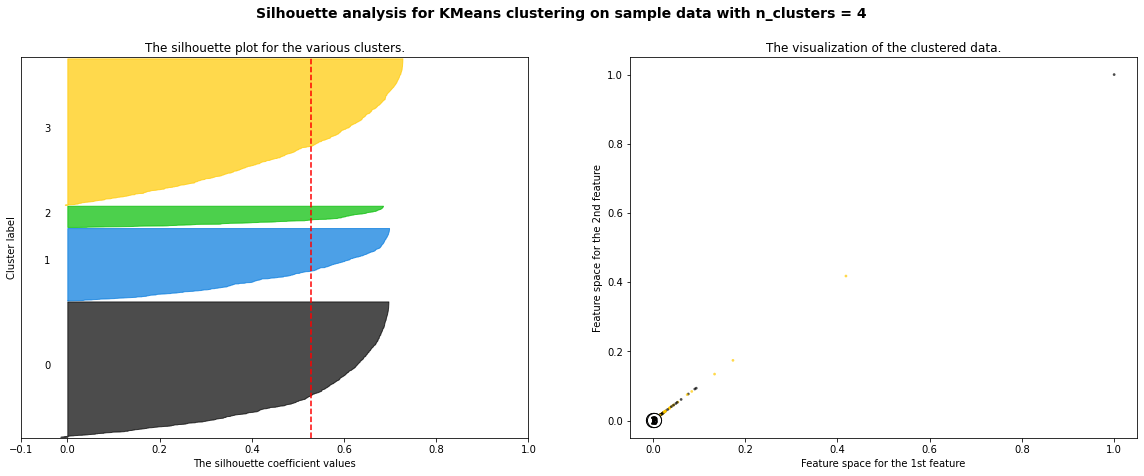

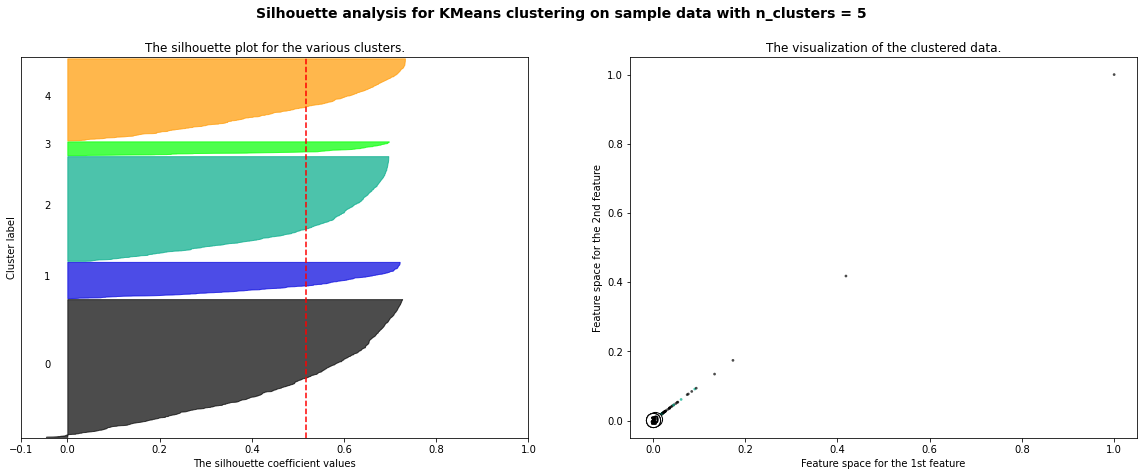

In [ ]:
silhoutte_analysis(df_scaled,[2, 3, 4, 5])

After doing both clustering method, the best number is 3 for number of clusters needed for our data.

### **Append Cluster Number**

After deciding the number of clusters, we can input the **cluster** into our data.

In [ ]:
cluster_model = cluster.KMeans(n_clusters = 3)
cluster_array = cluster_model.fit(df_cluster)
cluster_label = cluster_model.labels_

df_cluster['cluster'] = cluster_label
df_cluster.sort_values('cluster', ascending = False)

,total_order,total_user,median_purchase_nominal,cluster
customer_city,,,,
rio de janeiro,5488,5311,89.660,2
sao paulo,13114,12715,76.270,1
abadia dos dourados,2,2,96.935,0
pedrinhas paulista,4,4,130.265,0
pedra branca,3,3,50.530,0
...,...,...,...,...
francisco beltrao,37,37,107.140,0
francisco dantas,1,1,224.780,0
francisco dumont,2,2,34.090,0


## **Analyze Cluster Results**

We can analyze the cluster using the **descriptive statistics** of our data.

####**Total Order**

In [ ]:
df_cluster.groupby(['cluster'])['total_order'].agg(['count','sum','mean','max','min'])

,count,sum,mean,max,min
cluster,,,,,
0,3821,62038,16.236064,2275,1
1,1,13114,13114.000000,13114,13114
2,1,5488,5488.000000,5488,5488


**Analysis**
- **Cluster 0** : Have a small total order.
- **Cluster 1** : Have a high total order.
- **Cluster 2** : Have a moderate total order.

####**Total User**

In [ ]:
df_cluster.groupby(['cluster'])['total_user'].agg(['count','sum','mean','max','min'])

,count,sum,mean,max,min
cluster,,,,,
0,3821,60456,15.822036,2212,1
1,1,12715,12715.000000,12715,12715
2,1,5311,5311.000000,5311,5311


**Analysis**
- **Cluster 0** : Have a small total user.
- **Cluster 1** : Have a high total user.
- **Cluster 2** : Have a moderate total user.

####**Payment Value**

In [ ]:
df_cluster.groupby(['cluster'])['median_purchase_nominal'].agg(['count','mean','median','max','min'])

,count,mean,median,max,min
cluster,,,,,
0,3821,107.853928,96.095,343.71,4.39
1,1,76.270000,76.270,76.27,76.27
2,1,89.660000,89.660,89.66,89.66


**Analysis**
- **Cluster 0** : Spend the most amount.
- **Cluster 1** : Spend the least amount.
- **Cluster 2** : Spend in moderate amount.

##**Summary**

- **Cluster 0** : Have the smallest total order, with a small total users, who spends the most amount.
- **Cluster 1** : Have the highest total order, with a high total users, who spends the least amount.
- **Cluster 2** : Have the moderate total order, with a moderate total users, who spends moderate amount.

# **RFM Analysis**

This is the second method for customer segmentation, the segmentation were based on : 
- **Recency (R)** : Total # of days since the last purchase.
- **Frequency (F)** : Total # of purchase.
- **Monetary (M)** : Total amount spent.


##**Data Preparation**

First, we need to **import the tools** needed for the analysis.

###**Import RFM Tools**

In [ ]:
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=b887746ac7fb199b26adfe9d8955fa298cc9cb1ffd1a31a0cdf16c0d2ded5d63
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [ ]:
# RFM Analysis
# source: https://www.putler.com/rfm-analysis/

from pandasql import sqldf
pysqldfX = lambda q,ctx: sqldf(q, ctx)

class RFM():
  def __init__(self, 
        id_colname:str = 'id', 
        recency_colname:str = 'recency', 
        frequency_colname:str = 'frequency', 
        monetary_colname:str = 'monetary',
        num_cluster:int = 5
    ):
    self.id_colname = id_colname;
    self.recency_colname = recency_colname;
    self.frequency_colname = frequency_colname;
    self.monetary_colname = monetary_colname;
    self.num_cluster = num_cluster;
    #------------------------------------------
    self.dict_rfm_reference = {
      "Champions":{
        "Segment":"Champions",
        "Activity":"Bought recently, buy often and spend the most!",
        "Actionable":"Reward them. Can be early adopters for new products. Will promote your brand."
      },
      "Loyal Customers":{
        "Segment":"Loyal Customers",
        "Activity":"Spend good money with us often. Responsive to promotions.",
        "Actionable":"Upsell higher value products. Ask for reviews. Engage them."
      },
      "Potential Loyalist":{
        "Segment":"Potential Loyalist",
        "Activity":"Recent customers, but spent a good amount and bought more than once.",
        "Actionable":"Offer membership / loyalty program, recommend other products."
      },
      "Recent Customers":{
        "Segment":"Recent Customers",
        "Activity":"Bought most recently, but not often.",
        "Actionable":"Provide on-boarding support, give them early success, start building relationship."
      },
      "Promising":{
        "Segment":"Promising",
        "Activity":"Recent shoppers, but haven’t spent much.",
        "Actionable":"Create brand awareness, offer free trials"
      },
      "Customers Needing Attention":{
        "Segment":"Customers Needing Attention",
        "Activity":"Above average recency, frequency and monetary values. May not have bought very recently though.",
        "Actionable":"Make limited time offers, Recommend based on past purchases. Reactivate them."
      },
      "About To Sleep":{
        "Segment":"About To Sleep",
        "Activity":"Below average recency, frequency and monetary values. Will lose them if not reactivated.",
        "Actionable":"Share valuable resources, recommend popular products / renewals at discount, reconnect with them."
      },
      "At Risk":{
        "Segment":"At Risk",
        "Activity":"Spent big money and purchased often. But long time ago. Need to bring them back!",
        "Actionable":"Send personalized emails to reconnect, offer renewals, provide helpful resources."
      },
      "Can’t Lose Them":{
        "Segment":"Can’t Lose Them",
        "Activity":"Made biggest purchases, and often. But haven’t returned for a long time.",
        "Actionable":"Win them back via renewals or newer products, don’t lose them to competition, talk to them."
      },
      "Hibernating":{
        "Segment":"Hibernating",
        "Activity":"Last purchase was long back, low spenders and low number of orders.",
        "Actionable":"Offer other relevant products and special discounts. Recreate brand value."
      },
      "Lost":{
        "Segment":"Lost",
        "Activity":"Lowest recency, frequency and monetary scores.",
        "Actionable":"Revive interest with reach out campaign, ignore otherwise."
      }
    };

    _segments = {
      "Champions":[555, 554, 544, 545, 454, 455, 445],
      "Loyal Customers":[543, 444, 435, 355, 354, 345, 344, 335],
      "Potential Loyalist":[553, 551,552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 352, 351, 342, 341, 333, 323],
      "Recent Customers":[512, 511, 422, 421, 412, 411, 311],
      "Promising":[525, 524, 523, 522, 521, 515, 514, 513, 425, 424, 413,414, 415, 315, 314, 313],
      "Customers Needing Attention":[535, 534, 443, 434, 343, 334, 325, 324],
      "About To Sleep":[331, 321, 312, 221, 213],
      "At Risk":[255, 254, 245, 244, 253, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124],
      "Can’t Lose Them":[155, 154, 144, 214,215,115, 114, 113],
      "Hibernating":[332, 322, 231, 241, 251, 233, 232, 223, 222, 132, 123, 122, 212, 211],
      "Lost":[111, 112, 121, 131,141,151]
    }

    self.df_rfm_segmentation = {};
    for _segment in _segments.keys():
      for _rfm_score in _segments[_segment]:
        self.df_rfm_segmentation[str(_rfm_score)] = self.dict_rfm_reference[_segment];

    #------------------------------------------
    self.df_recency_model = None;
    self.df_frequency_model = None;
    self.df_monetary_model = None;
  
  def __get_rfm_dataset_query__(self)->str:
    return f"""
      select 
        "{self.id_colname}" as id, 
        "{self.recency_colname}" as recency,
        "{self.frequency_colname}" as frequency,
        "{self.monetary_colname}" as monetary 
      from df
    """;

  def extract_dataset(self,df_x):
    #step 0: extract the dataset
    str_query = self.__get_rfm_dataset_query__();
    df_rfm_dataset = pysqldfX(str_query,{"df":df_x});
    return df_rfm_dataset;

  def get_feature_clusters(self, df_rfm_dataset) -> pd.DataFrame:
    df_rfm_dataset['recency_score'] = pd.qcut(
        x=df_rfm_dataset['recency'].values,
        q=self.num_cluster, labels = False
    )+1;
    df_rfm_dataset['frequency_score'] = pd.qcut(
        x=df_rfm_dataset['frequency'].values,
        q=self.num_cluster, labels = False
    )+1;
    df_rfm_dataset['monetary_score'] = pd.qcut(
        x=df_rfm_dataset['monetary'].values,
        q=self.num_cluster, labels = False
    )+1;
    self.df_recency_model = pysqldfX("""
      select 'recency' as label, recency_score as score, min(recency) as min, max(recency) as max 
      from df group by recency_score order by recency_score asc
    """,{"df":df_rfm_dataset});
    self.df_frequency_model = pysqldfX("""
      select 'frequency' as label, frequency_score as score, min(frequency) as min, max(frequency) as max 
      from df group by frequency_score order by frequency_score asc
    """,{"df":df_rfm_dataset});
    self.df_monetary_model = pysqldfX("""
      select 'monetary' as label, monetary_score as score, min(monetary) as min, max(monetary) as max 
      from df group by monetary_score order by monetary_score asc
    """,{"df":df_rfm_dataset});

  def generate_sql_model(self, df_x):
    label = df_x['label'].unique()[0];
    _cache = [];
    row_counts = df_x.shape[0];
    for i in range(0, row_counts):
      if(i+1<row_counts):
        _cache.append(f"""when {label} <= {df_x['max'][i]} then {df_x['score'][i]}""");
      else:
        _cache.append(f"""when {label} > {df_x['max'][i-1]} then {df_x['score'][i]}""");
    _str = "\n".join(_cache);
    return f"""(case {_str} end) as {label}_score""";

  def score(self, df_x) -> pd.DataFrame:
    #step 0: extract the dataset
    df_rfm_dataset = self.extract_dataset(df_x);

    str_query = f"""
      with tmp as (
        select df.*,
          {self.generate_sql_model(self.df_recency_model)},
          {self.generate_sql_model(self.df_frequency_model)},
          {self.generate_sql_model(self.df_monetary_model)}
        from df
      )
      select tmp.*, (recency_score||frequency_score||monetary_score) as rfm_score
      from tmp
    """;
    return pysqldfX(str_query,{"df":df_rfm_dataset});

  def label_samples(self, df_rfm_feature_scored) -> pd.DataFrame:
    label_ref = [];
    for i in range(0,df_rfm_feature_scored.shape[0]):
      label_ref.append(
          self.df_rfm_segmentation[str(df_rfm_feature_scored['rfm_score'][i])]
      );
    return pd.concat([df_rfm_feature_scored, pd.DataFrame(label_ref)],axis=1);

  def fit(self, df_x):
    #step 0: extract the dataset
    df_rfm_dataset = self.extract_dataset(df_x);

    #step 1: divide each RFM feature into n buckets
    df_rfm_dataset = self.get_feature_clusters(df_rfm_dataset);

  def transform(self, df_x) -> pd.DataFrame:
    #step 2: score each feature based on model
    df_rfm_feature_scored = self.score(df_x);

    #step 3: map each row with their reference table
    df_rfm_feature_labeled = self.label_samples(df_rfm_feature_scored);

    return df_rfm_feature_labeled;

  def fit_transform(self, df_x: pd.DataFrame) -> pd.DataFrame :
    self.fit(df_x);
    return self.transform(df_x);

##**Prepare RFM**

Before segmenting our customer, we need to make our data able to be segmented, in this case we need to find the **Recency, Frequency and Monetary** values in our data.

###**Calculate Recency**

Preparing and calculating the recency of our customer.

In [ ]:
df_prep = dfc.copy()
latest_purchase = max(df_prep['order_purchase_timestamp'])
df_prep['Recency'] = (latest_purchase - df_prep['order_purchase_timestamp']).dt.days
df_prep.drop(['customer_id', 'order_purchase_timestamp', 'payment_type', 'payment_installments', 'customer_city'], axis = 1, inplace = True)
df_prep.head()

,order_id,payment_value,customer_unique_id,Recency
0,e481f51cbdc54678b7cc49136f2d6af7,18.12,7c396fd4830fd04220f754e42b4e5bff,331
1,e481f51cbdc54678b7cc49136f2d6af7,2.00,7c396fd4830fd04220f754e42b4e5bff,331
2,e481f51cbdc54678b7cc49136f2d6af7,18.59,7c396fd4830fd04220f754e42b4e5bff,331
3,53cdb2fc8bc7dce0b6741e2150273451,141.46,af07308b275d755c9edb36a90c618231,35
4,47770eb9100c2d0c44946d9cf07ec65d,179.12,3a653a41f6f9fc3d2a113cf8398680e8,21


We assume that the **last date** in the dataset is the **current date**, so we search for the **max values** in datetime and **subtract** it with the date in **order purchase timestamp**.

###**Data Aggregation**

After calculating the **Recency**, we aggregate the data to find the **Frequency** and **Monetary** values.

In [ ]:
df_rfm = df_prep.groupby('customer_unique_id').agg(recency = pd.NamedAgg(column = 'Recency', aggfunc = 'min'),
                                                   frequency = pd.NamedAgg(column = 'order_id', aggfunc = 'count'),
                                                   monetary = pd.NamedAgg(column = 'payment_value', aggfunc = 'sum'))
df_rfm.reset_index(inplace = True)
df_rfm

,customer_unique_id,recency,frequency,monetary
0,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
1,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62
2,0004aac84e0df4da2b147fca70cf8255,287,1,196.89
3,00050ab1314c0e55a6ca13cf7181fecf,131,1,35.38
4,0005e1862207bf6ccc02e4228effd9a0,542,1,150.12
...,...,...,...,...
78402,fffbf87b7a1a6fa8b03f081c5f51a201,244,1,167.32
78403,fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58
78404,ffff371b4d645b6ecea244b27531430a,567,1,112.46
78405,ffff5962728ec6157033ef9805bacc48,118,1,133.69


###**Calculate RFM Score**

Calculaing the RFM score for segmentation, using qcut (quatile calculation) and divide it into 5 segments. What we're looking at are the customer get more score if they recently purchased, make more than on purchase and the amount spent are a lot.

In [ ]:
df_rfm['recency_score'] = pd.qcut(df_rfm['recency'], q = 5, labels = [1, 2, 3, 4, 5])

f1, f2, f3, f4, f5 = (df_rfm['frequency'] <= 5), (df_rfm['frequency'] > 5), (df_rfm['frequency'] > 10), (df_rfm['frequency'] > 15), (df_rfm['frequency'] > 20)
df_rfm.loc[f1, 'frequency_score'] = 1
df_rfm.loc[f2, 'frequency_score'] = 2
df_rfm.loc[f3, 'frequency_score'] = 3
df_rfm.loc[f4, 'frequency_score'] = 4
df_rfm.loc[f5, 'frequency_score'] = 5
df_rfm['frequency_score'] = df_rfm['frequency_score'].astype(int)

df_rfm['monetary_score'] = pd.qcut(df_rfm['monetary'], q = 5, labels = [1, 2, 3, 4, 5])
df_rfm

,customer_unique_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score
0,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,2,1,1
1,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,4,1,1
2,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,4,1,5
3,00050ab1314c0e55a6ca13cf7181fecf,131,1,35.38,2,1,1
4,0005e1862207bf6ccc02e4228effd9a0,542,1,150.12,5,1,4
...,...,...,...,...,...,...,...
78402,fffbf87b7a1a6fa8b03f081c5f51a201,244,1,167.32,3,1,5
78403,fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58,3,1,3
78404,ffff371b4d645b6ecea244b27531430a,567,1,112.46,5,1,3
78405,ffff5962728ec6157033ef9805bacc48,118,1,133.69,2,1,4


###**Append RFM Score**

After having all the score calculated, now we just have to concate the score into one and that will be our RFM score. The RFM Score will detrmine which will go to which group. i.e. Recent Customer, Etc.

In [ ]:
df_rfm['rfm_score'] = df_rfm['recency_score'].astype(str) + df_rfm['frequency_score'].astype(str) + df_rfm['monetary_score'].astype(str)
df_rfm

,customer_unique_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score
0,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,2,1,1,211
1,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,4,1,1,411
2,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,4,1,5,415
3,00050ab1314c0e55a6ca13cf7181fecf,131,1,35.38,2,1,1,211
4,0005e1862207bf6ccc02e4228effd9a0,542,1,150.12,5,1,4,514
...,...,...,...,...,...,...,...,...
78402,fffbf87b7a1a6fa8b03f081c5f51a201,244,1,167.32,3,1,5,315
78403,fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58,3,1,3,313
78404,ffff371b4d645b6ecea244b27531430a,567,1,112.46,5,1,3,513
78405,ffff5962728ec6157033ef9805bacc48,118,1,133.69,2,1,4,214


###**Append Segments**

In [ ]:
rfm = RFM(
    id_colname ='customer_unique_id',
    recency_colname = 'recency', 
    frequency_colname = 'frequency', 
    monetary_colname = 'monetary'
);

rfm_label = rfm.label_samples(df_rfm)
rfm_label

,customer_unique_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score,Segment,Activity,Actionable
0,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,2,1,1,211,Hibernating,"Last purchase was long back, low spenders and ...",Offer other relevant products and special disc...
1,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,4,1,1,411,Recent Customers,"Bought most recently, but not often.","Provide on-boarding support, give them early s..."
2,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,4,1,5,415,Promising,"Recent shoppers, but haven’t spent much.","Create brand awareness, offer free trials"
3,00050ab1314c0e55a6ca13cf7181fecf,131,1,35.38,2,1,1,211,Hibernating,"Last purchase was long back, low spenders and ...",Offer other relevant products and special disc...
4,0005e1862207bf6ccc02e4228effd9a0,542,1,150.12,5,1,4,514,Promising,"Recent shoppers, but haven’t spent much.","Create brand awareness, offer free trials"
...,...,...,...,...,...,...,...,...,...,...,...
78402,fffbf87b7a1a6fa8b03f081c5f51a201,244,1,167.32,3,1,5,315,Promising,"Recent shoppers, but haven’t spent much.","Create brand awareness, offer free trials"
78403,fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58,3,1,3,313,Promising,"Recent shoppers, but haven’t spent much.","Create brand awareness, offer free trials"
78404,ffff371b4d645b6ecea244b27531430a,567,1,112.46,5,1,3,513,Promising,"Recent shoppers, but haven’t spent much.","Create brand awareness, offer free trials"
78405,ffff5962728ec6157033ef9805bacc48,118,1,133.69,2,1,4,214,Can’t Lose Them,"Made biggest purchases, and often. But haven’t...","Win them back via renewals or newer products, ..."


In [ ]:
rfm_label['Segment'].value_counts()

Promising                      27643
Can’t Lose Them                16178
Recent Customers               16139
About To Sleep                  6200
Lost                            6096
Hibernating                     6087
At Risk                           24
Customers Needing Attention       17
Potential Loyalist                15
Champions                          4
Loyal Customers                    4
Name: Segment, dtype: int64

now we check the distribution by **Recency** vs. **Monetary**

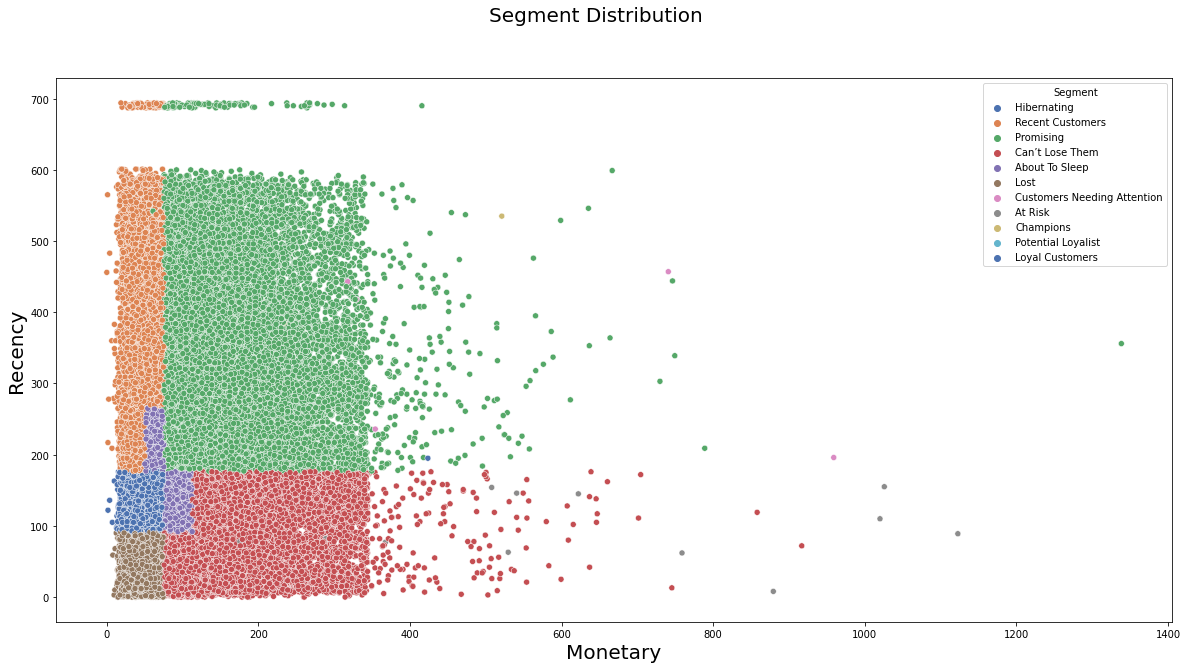

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
fig.suptitle('Segment Distribution', fontsize=20)
plt.xlabel('Monetary', fontsize=20)
plt.ylabel('Recency', fontsize=20)
sns.scatterplot(data=rfm_label, x="monetary", y="recency", hue="Segment", palette="deep")
plt.show()

##**Analyze RFM Results**

Now. we will look at the **average value** for each **RFM**,

In [ ]:
df_rfm_table = rfm_label.groupby('Segment').agg(count = pd.NamedAgg('customer_unique_id', aggfunc = 'count'),
                                                recency = pd.NamedAgg('recency', aggfunc = 'mean'),
                                                frequency = pd.NamedAgg('frequency', aggfunc = 'mean'),
                                                monetary = pd.NamedAgg('monetary', aggfunc = 'mean'))
df_rfm_table.reset_index(inplace = True)
df_rfm_table['count %'] = round((df_rfm_table['count']/df_rfm_table['count'].sum())*100,2)
df_rfm_table['monetary %'] = round((df_rfm_table['monetary']/df_rfm_table['monetary'].sum())*100,2)
df_rfm_table.sort_values(by = 'count', ascending = False, inplace = True)
df_rfm_table

,Segment,count,recency,frequency,monetary,count %,monetary %
9,Promising,27643,332.643563,1.090801,152.658899,35.26,8.16
2,Can’t Lose Them,16178,81.197676,1.089072,166.369834,20.63,8.89
10,Recent Customers,16139,357.650970,1.048020,47.485302,20.58,2.54
0,About To Sleep,6200,174.921290,1.050161,78.513773,7.91,4.20
6,Lost,6096,43.334482,1.038058,49.234447,7.77,2.63
5,Hibernating,6087,134.951372,1.059142,49.942890,7.76,2.67
1,At Risk,24,89.166667,7.916667,432.373333,0.03,23.11
4,Customers Needing Attention,17,323.764706,8.882353,298.881176,0.02,15.98
8,Potential Loyalist,15,340.800000,11.000000,89.144667,0.02,4.76
3,Champions,4,462.250000,22.750000,276.970000,0.01,14.80


In [ ]:
!pip install squarify

import squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(0.0, 100.0, 0.0, 100.0)

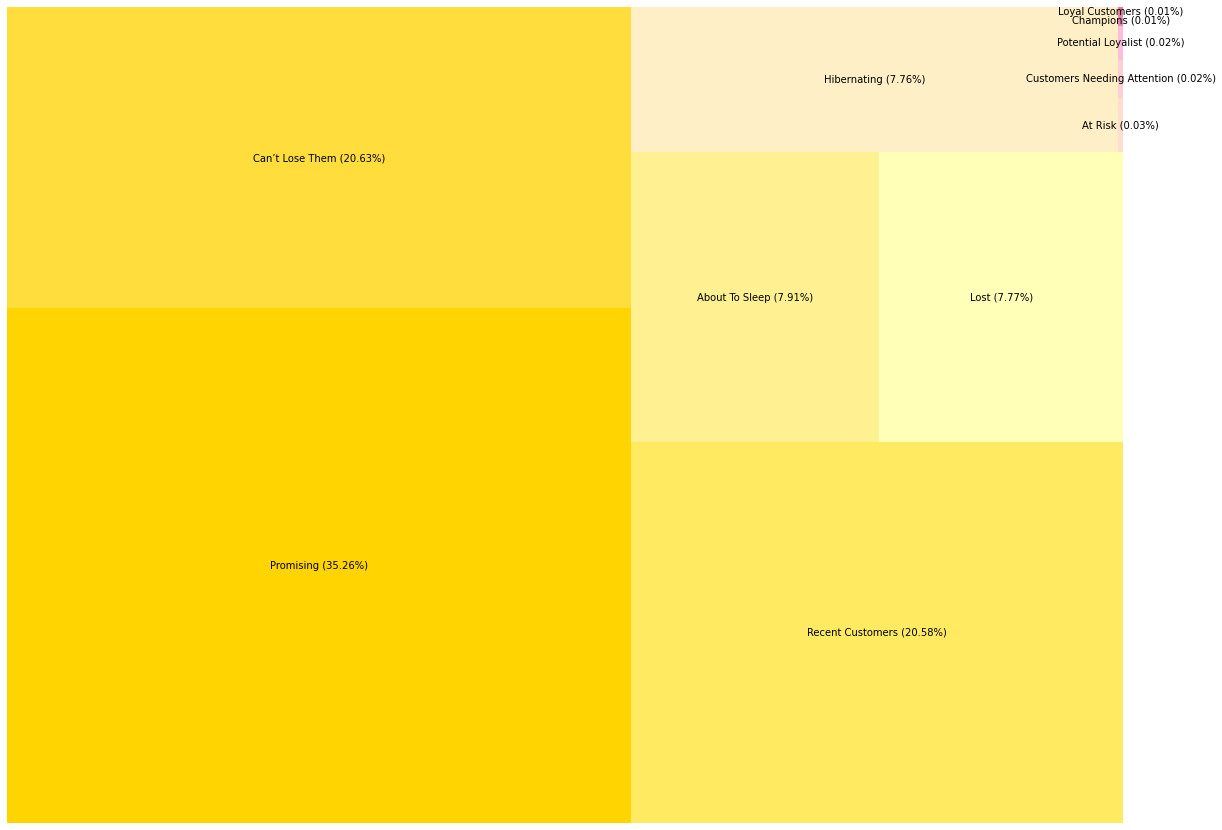

In [ ]:
colors = ['#FFD400', '#FFDD3C', '#FFEA61', '#FFF192', '#FFFFB7', '#FFEFC6', '#FFDECD', '#FFCED4', '#FFBDDB', '#E489AB', '#E47C9F']
labels = df_rfm_table['Segment'] + ' ' + '(' + df_rfm_table['count %'].astype(str) + '%' + ')'
labels2 = df_rfm_table['Segment'] + ' ' + '(' + df_rfm_table['monetary %'].astype(str) + '%' + ')'

plt.figure(figsize = (20, 15))
squarify.plot(sizes=df_rfm_table['count'], color=colors, label = labels)
plt.axis("off")

(0.0, 100.0, 0.0, 100.0)

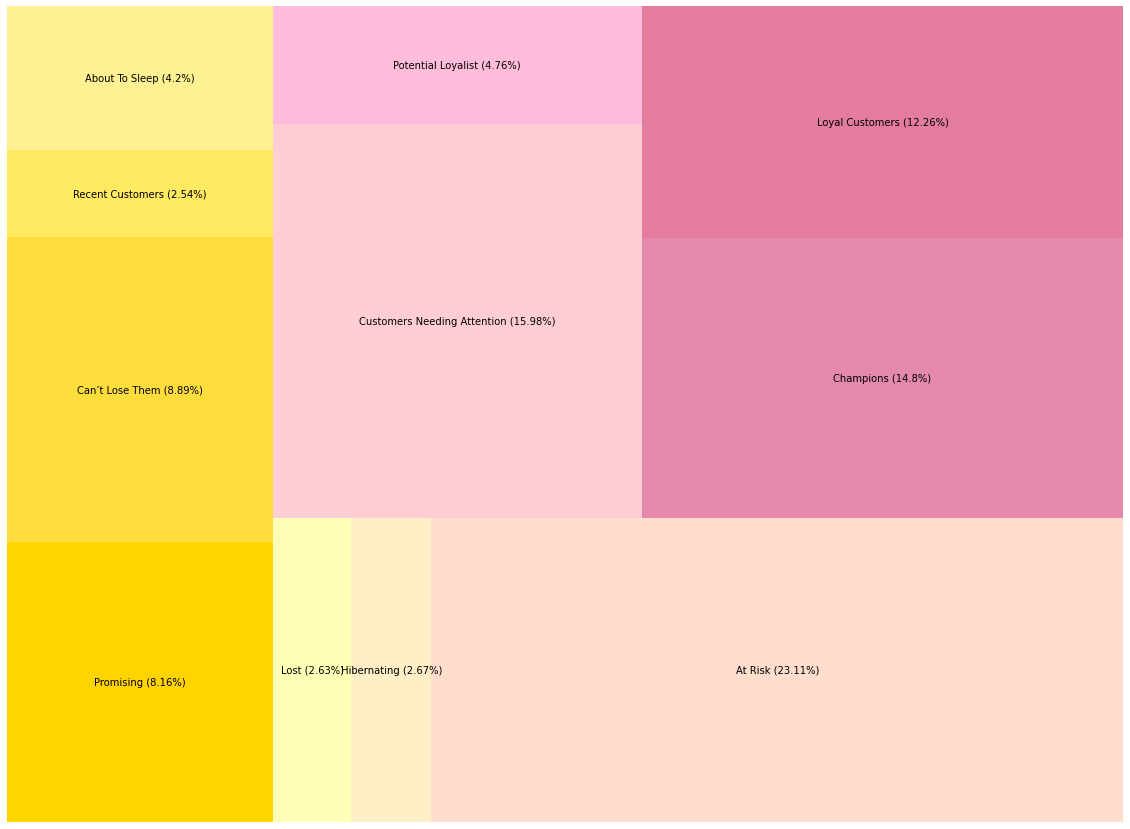

In [ ]:
plt.figure(figsize = (20, 15))
squarify.plot(sizes=df_rfm_table['monetary'], color = colors, label = labels2)
plt.axis("off")

- Top 3 segment where most of our customer lies in is **'Promising'**, **'Can't Lose Them'** and **'Recent Customers'**.
- **Loyal customers** is in the very few.
- Our top spender where the majority of our revenue coming from are **'At Risk'** and **'Customer Needing Attention'**.

#**Recommendation**

####**Overall**

- Seek the cause of sudden drop in December 2017.
- Monday have the highest sales overall, we can make a 'Monday Sales' to boost our sales further.
- We can do more large promos in Top 10 city where customer lived or order from.
- Do the recommendation in Cluster and RFM Analysis.

####**Cluster Analysis**

**Cluster 0:**
- We can try to give email so the customers in this cluster will retain and come back frequently to our place.
- Make promos to pull more customers.
- Make promos for large purchases, because in this cluster the customers tends to spent the highest amount.

**Cluster 1:**
- For this we don't really have to do any promos to pull more customer.
- Try to do bundling because customers in this segment tends not to buy often.

**Cluster 2:**
- This customer already have a balanced values, we can do all of the recommendation above including the overall recommendation to further boost our customers.

####**RFM Analysis**

What we can do to Top 3 segments with highest number customers that is **Promising**, **Can't Lose Them**, **Recent Customers** are: 
- Create brand awareness, offer free trials
- Win them back via renewals or newer products, don’t lose them to competition, talk to them.
- Provide on-boarding support, give them early success, start building relationship.

Now if we look at the amount of revenue with the top 2 segments are **At Risk** and **Customer Needing Attention**, the recommendation will be: 
- Send personalized emails to reconnect, offer renewals, provide helpful resources.
- Make limited time offers, Recommend based on past purchases. Reactivate them.